#Import Dependencies

In [28]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#Import Dataset

In [29]:
df = pd.read_csv("mushrooms.csv", sep = ",")

#Exploring DataSet

In [30]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [31]:
print(df.shape)

(8124, 23)


In [32]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#Handling Dupliacte Values

In [33]:
df = df.drop_duplicates()

#Handling Null Values

In [34]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [35]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#Drop Insignificant Values

In [36]:
columns_to_drop = ['odor', 'gill-size', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'veil-type', 'veil-color', 'ring-number', 'spore-print-color']
df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stalk-shape',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'population', 'habitat'],
      dtype='object')

#Label Encoding

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stalk-shape',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'population', 'habitat']
for column in columns:
    encoded_values = le.fit_transform(df[column])
    df[column] = encoded_values

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-color,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,ring-type,population,habitat
0,1,5,2,4,1,1,0,4,0,7,7,4,3,5
1,0,5,2,9,1,1,0,4,0,7,7,4,2,1
2,0,0,2,8,1,1,0,5,0,7,7,4,2,3
3,1,5,3,8,1,1,0,5,0,7,7,4,3,5
4,0,5,2,3,0,1,1,4,1,7,7,0,0,1


#Splitting Dataset into testing and training

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Making Correlation Matrix

In [39]:
correlation_matrix = df.corr()

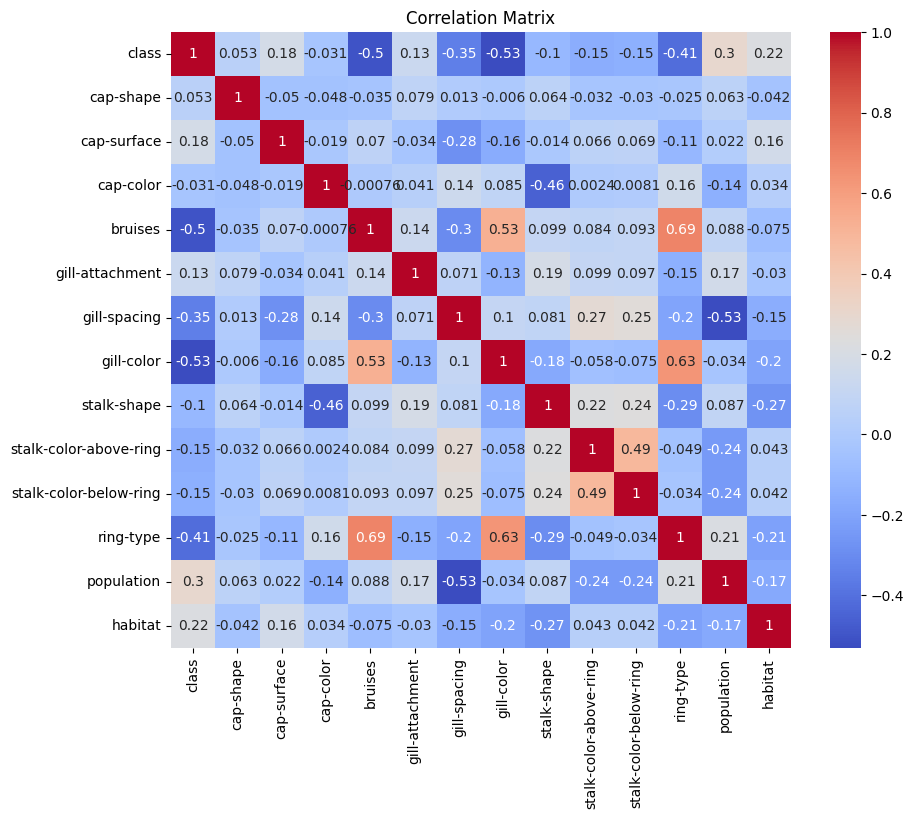

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#Confusion Matrix

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def plot_confusion_matrix(y_test, y_pred, target_names):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [42]:
target_names = ["Edible", "Poisonous"]

#Logistic Regression

              precision    recall  f1-score   support

      Edible       0.85      0.96      0.90      1257
   Poisonous       0.95      0.82      0.88      1181

    accuracy                           0.89      2438
   macro avg       0.90      0.89      0.89      2438
weighted avg       0.90      0.89      0.89      2438



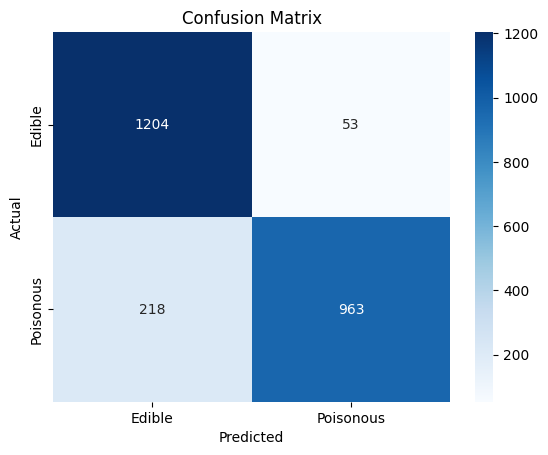

Accuracy: 0.8888433141919606


In [43]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train, y_train)
y_pred = logreg_classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, target_names)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Gaussian Naive Bias

              precision    recall  f1-score   support

      Edible       0.84      0.93      0.88      1257
   Poisonous       0.92      0.82      0.86      1181

    accuracy                           0.87      2438
   macro avg       0.88      0.87      0.87      2438
weighted avg       0.88      0.87      0.87      2438



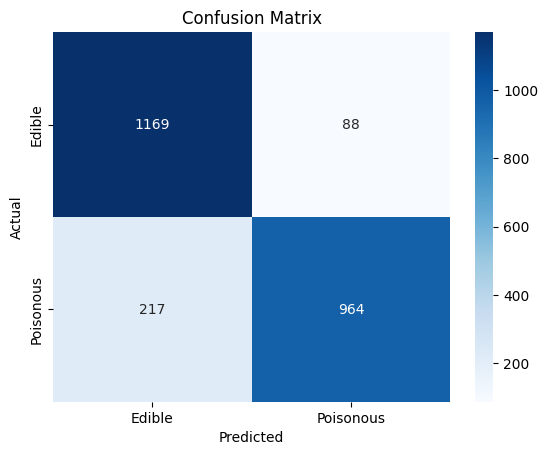

Accuracy: 0.8748974569319115


In [44]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred,target_names)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#KNN

              precision    recall  f1-score   support

      Edible       0.98      0.97      0.98      1257
   Poisonous       0.97      0.98      0.97      1181

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



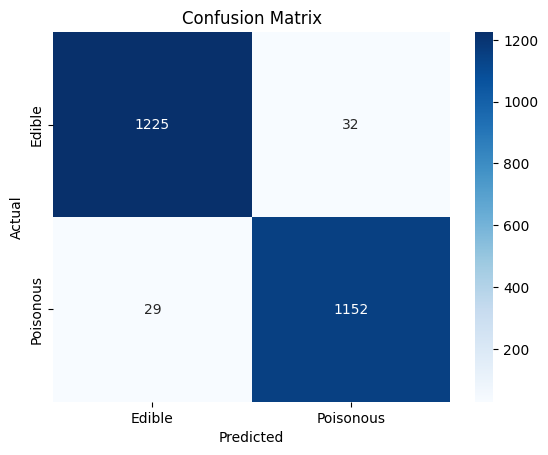

Accuracy: 0.9749794913863823


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, target_names)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Save Model

In [46]:
import joblib
joblib.dump(knn_classifier, 'knn_model.pkl')

['knn_model.pkl']